#  EMF RBM Energy Densities 200 Epochs

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [15]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_image(image): 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

In [3]:
import rbm_datasets

In [5]:
train_x, train_t, train_char, test_x, test_t, test_char = rbm_datasets.load_omniglot_iwae()

In [47]:
from sklearn.preprocessing import binarize
X = binarize(train_x, threshold=0.5, copy=True)

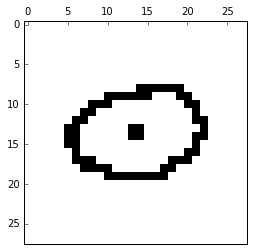

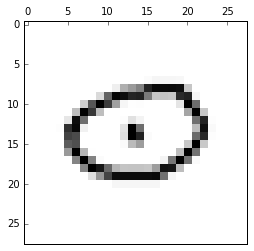

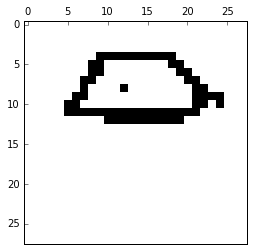

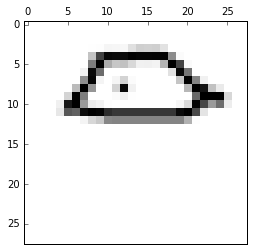

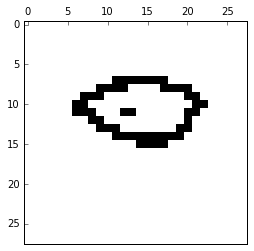

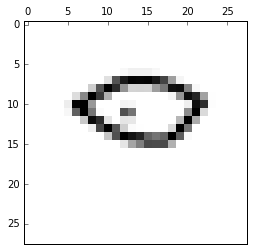

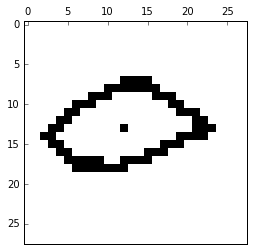

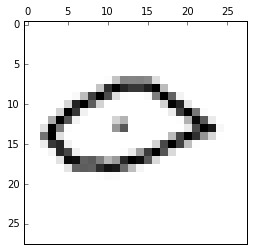

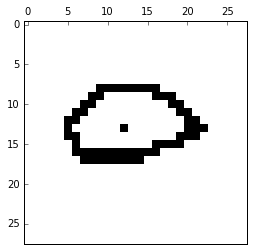

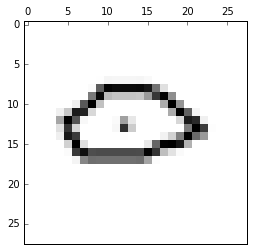

In [50]:
for i in range(5):
    show_image(X[i+100].reshape(28,28))
    show_image(train_x[i+100].reshape(28,28))

In [8]:
X.shape

(24345, 784)

### Helper methods for simple case

In [51]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

### Baseline

In [52]:
import emf_rbm

In [53]:
psutil.swap_memory()

sswap(total=10737418240L, used=9594732544L, free=1142685696L, percent=89.4, sin=54376243200L, sout=298819584L)

### mean Entropy, Energy, and Free Energy

In [59]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, n_iter=500)
print rbm
rbm= rbm.fit(X)

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=True, n_components=256, n_iter=500, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x106cef3c0>, sigma=0.001,
    thresh=1e-08, verbose=True, weight_decay='L1')
[EMF_RBM] Iteration 1, pseudo-likelihood = -172.73, time = 8.57s
computing TAP Free Energies
monitor:  -243.654795848 346.498892742 102.846896891
[EMF_RBM] Iteration 2, pseudo-likelihood = -172.09, time = 20.21s
computing TAP Free Energies
monitor:  -243.46130944 346.473294885 103.014661885
[EMF_RBM] Iteration 3, pseudo-likelihood = -181.18, time = 20.23s
computing TAP Free Energies
monitor:  -243.272741056 346.469711359 103.199878409
[EMF_RBM] Iteration 4, pseudo-likelihood = -176.23, time = 19.71s
computing TAP Free Energies
monitor:  -243.078466915 346.462606211 103.388179306
[EMF_RBM] Iteration 5, pseudo-likelihood = -173.92, time = 22.47s
computing TAP Free Energies
monitor:  -242.854852231 346.423746304 103.577088069
[EMF_RBM] 

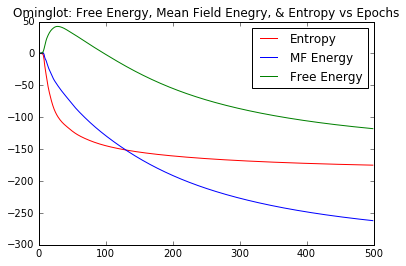

In [61]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enegry, & Entropy vs Epochs")
